# Sub question 4: Education

Intro

Welke indicator wordt hier gebruikt? Wat is de data die beschikbaar is? Missing data? Op welke manier wordt de value gegeven? In percentages, absolute aantallen?

Verschil tussen mannen en vrouw in education. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

In [24]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [18]:
#wbdata.get_source()

In [14]:
#wbdata.get_indicator(source=16)

In [ ]:
#Indicators
# SE.PRM.NENR.MA      	School enrollment, primary, male (% net)
# SE.PRM.NENR.FE      	School enrollment, primary, female (% net)
# SE.SEC.NENR.MA      	School enrollment, secondary, male (% net)
# SE.SEC.NENR.FE      	School enrollment, secondary, female (% net)
# SE.PRM.CMPT.MA.ZS   	Primary completion rate, male (% of relevant age group)
# SE.PRM.CMPT.FE.ZS   	Primary completion rate, female (% of relevant age group)
# SE.ADT.LITR.MA.ZS   	Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS   	Literacy rate, adult female (% of females ages 15 and above)
# SE.ADT.1524.LT.FM.ZS	Literacy rate, youth (ages 15-24), gender parity index (GPI)

In [34]:
def clean(indicator):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(indicator))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [35]:
# make a dataframe from the indicator of gender equality rate
CPIA_all = clean("IQ.CPA.GNDR.XQ")

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [ ]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [20]:
wbdata.get_data("SE.PRM.NENR.MA")
wbdata.get_data("SE.PRM.NENR.FE")
wbdata.get_data("SE.SEC.NENR.MA")
wbdata.get_data("SE.SEC.NENR.FE")
wbdata.get_data("SE.PRM.CMPT.MA.ZS")
wbdata.get_data("SE.PRM.CMPT.FE.ZS")
wbdata.get_data("SE.ADT.LITR.MA.ZS")
wbdata.get_data("SE.ADT.LITR.FE.ZS")
wbdata.get_data("SE.ADT.1524.LT.FM.ZS")

[{'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': None,
  'decimal': '2',
  'date': '2017'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93649',
  'decimal': '2',
  'date': '2016'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93417',
  'decimal': '2',
  'date': '2015'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'},
  'country': {'id': '1A', 'value': 'Arab World'},
  'value': '0.93081',
  'decimal': '2',
  'date': '2014'},
 {'indicator': {'id': 'SE.ADT.1524.LT.FM.ZS',
   'value': 'Literacy rate, you

In [29]:
# Make a dataframe from the indicators data
Primary_School_Male = clean ('SE.PRM.NENR.MA')
Primary_School_Female = clean ('SE.PRM.NENR.FE')
Secundary_School_Male = clean ('SE.SEC.NENR.MA')
Secundary_School_Female = clean ('SE.SEC.NENR.FE')
Complete_PrimSchool_Male = clean ('SE.PRM.CMPT.MA.ZS')
Complete_PrimSchool_Female = clean ('SE.PRM.CMPT.FE.ZS')
Literacy_Rate_Male = clean ('SE.ADT.LITR.MA.ZS')
Literacy_Rate_Female = clean ('SE.ADT.LITR.FE.ZS')
GPI = clean ('SE.ADT.1524.LT.FM.ZS')

In [43]:
#Primary school enrolment
#find rows where the value is greater than 0
PSM_All = Primary_School_Male.loc[(Primary_School_Male["value"] >= 0)]
PSF_All = Primary_School_Female.loc[(Primary_School_Female['value'] >=0)]

#find the rows with the most recent data
PSM_recent = PSM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
PSM_recent["date"] = PSM_recent.date.astype(str)

PSF_recent = PSF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
PSF_recent['date'] = PSF_All.date.astype(str)

#Secundary school enrolment
#find rows where the value is greater than 0
SSM_All = Secundary_School_Male.loc[(Secundary_School_Male["value"] >= 0)]
SSF_All = Secundary_School_Female.loc[(Secundary_School_Female['value'] >=0)]

#find the rows with the most recent data
SSM_recent = SSM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
SSM_recent["date"] = SSM_recent.date.astype(str)

SSF_recent = SSF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
SSF_recent['date'] = SSF_All.date.astype(str)

In [78]:
#Primary school enrolment
PSM15_worst15 = pd.merge( CPIA_worst15, PSM_recent, how = "left", left_on = ["country"], right_on = ["country"])
PSF15_worst15 = pd.merge( CPIA_worst15, PSF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

#secundary school enrolment
SSM15_worst15 = pd.merge( CPIA_worst15, SSM_recent, how = "left", left_on = ["country"], right_on = ["country"])
SSF15_worst15 = pd.merge( CPIA_worst15, SSF_recent, how = 'left', left_on = ["country"], right_on = ["country"])


# Stack plots

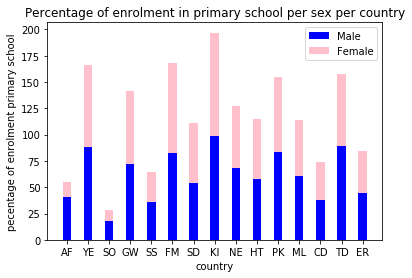

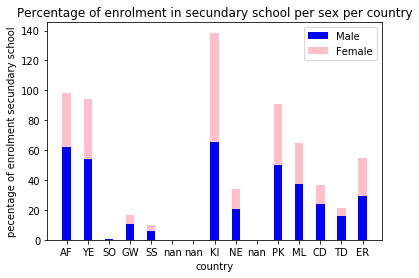

In [85]:
#Make arrays of needed columns
PSM15 = PSM15_worst15.value_y.values
PSF15 = PSF15_worst15.value_y.values
Countries = PSM15_worst15.country_code_y.values

N = len(Countries) #setting x axes
ind = np.arange(N) 
width = 0.4        #width of the bars

p1 = plt.bar(ind, PSM15, width, label = 'Male', color='blue')
p2 = plt.bar(ind, PSF15, width, bottom=PSM15, label = 'Female', color='pink')

plt.xticks(ind, Countries) #naming the bars
plt.ylabel ('pecentage of enrolment primary school')
plt.xlabel ('country')
plt.title ('Percentage of enrolment in primary school per sex per country')

plt.legend()
plt.show()

#Make arrays of needed columns
SSM15 = SSM15_worst15.value_y.values
SSF15 = SSF15_worst15.value_y.values
Countries = SSM15_worst15.country_code_y.values

N = len(Countries) #setting x axes
ind = np.arange(N) 
width = 0.4        #width of the bars

p1 = plt.bar(ind, SSM15, width, label = 'Male', color='blue')
p2 = plt.bar(ind, SSF15, width, bottom=SSM15, label = 'Female', color='pink')

plt.xticks(ind, Countries) #naming the bars
plt.ylabel ('pecentage of enrolment secundary school')
plt.xlabel ('country')
plt.title ('Percentage of enrolment in secundary school per sex per country')

plt.legend()
plt.show()


In [88]:
CPM_All = Complete_PrimSchool_Male.loc[(Complete_PrimSchool_Male["value"] >= 0)]
CPF_All = Complete_PrimSchool_Female.loc[(Complete_PrimSchool_Female['value'] >=0)]

#find the rows with the most recent data
CPM_recent = CPM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
CPM_recent["date"] = CPM_recent.date.astype(str)

CPF_recent = CPF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
CPF_recent['date'] = CPF_All.date.astype(str)

In [89]:
CPM15_worst15 = pd.merge( CPIA_worst15, CPM_recent, how = "left", left_on = ["country"], right_on = ["country"])
CPF15_worst15 = pd.merge( CPIA_worst15, CPF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

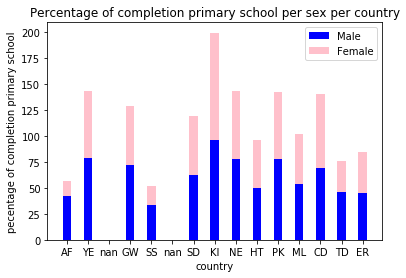

In [91]:
#Make arrays of needed columns
CPM15 = CPM15_worst15.value_y.values
CPF15 = CPF15_worst15.value_y.values
Countries = CPM15_worst15.country_code_y.values

N = len(Countries) #setting x axes
ind = np.arange(N) 
width = 0.4        #width of the bars

p1 = plt.bar(ind, CPM15, width, label = 'Male', color='blue')
p2 = plt.bar(ind, CPF15, width, bottom=CPM15, label = 'Female', color='pink')

plt.xticks(ind, Countries) #naming the bars
plt.ylabel ('pecentage of completion primary school')
plt.xlabel ('country')
plt.title ('Percentage of completion primary school per sex per country')

plt.legend()
plt.show()

In [92]:
LRM_All = Literacy_Rate_Male.loc[(Literacy_Rate_Male["value"] >= 0)]
LRF_All = Literacy_Rate_Female.loc[(Literacy_Rate_Female['value'] >=0)]

#find the rows with the most recent data
LRM_recent = LRM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
LRM_recent["date"] = LRM_recent.date.astype(str)

LRF_recent = LRF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
LRF_recent['date'] = LRF_All.date.astype(str)

In [93]:
LRM15_worst15 = pd.merge( CPIA_worst15, LRM_recent, how = "left", left_on = ["country"], right_on = ["country"])
LRF15_worst15 = pd.merge( CPIA_worst15, LRF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

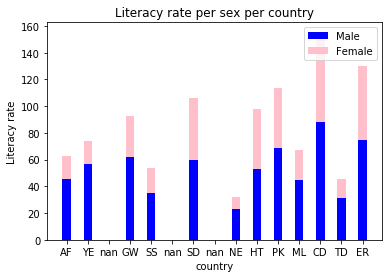

In [95]:
#Make arrays of needed columns
LRM15 = LRM15_worst15.value_y.values
LRF15 = LRF15_worst15.value_y.values
Countries = LRM15_worst15.country_code_y.values

N = len(Countries) #setting x axes
ind = np.arange(N) 
width = 0.4        #width of the bars

p1 = plt.bar(ind, LRM15, width, label = 'Male', color='blue')
p2 = plt.bar(ind, LRF15, width, bottom=LRM15, label = 'Female', color='pink')

plt.xticks(ind, Countries) #naming the bars
plt.ylabel ('Literacy rate')
plt.xlabel ('country')
plt.title ('Literacy rate per sex per country')

plt.legend()
plt.show()

In [103]:
def select_year():
    years = GPI.loc[(GPI['date'] >= 2007) & (GPI['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

GPI_years = select_year()

In [ ]:
def graph(dataframe, title_graph, x_label, y_label):
    # Visualising changes over time per indicator

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
graph(GPI_years, 'GPI over time')